#Import librery

In [1]:

import os
import shutil
import warnings
from os.path import isfile
from datetime import datetime, timedelta
from google.colab import drive

import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import BeautifyIcon
import matplotlib
%matplotlib inline

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
import statsmodels.tsa.seasonal as tsa
import statsmodels.graphics.tsaplots as tsaplots

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Input
from keras.preprocessing import timeseries_dataset_from_array
from keras.utils import set_random_seed
from keras.optimizers import Adam
import calendar
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau



warnings.filterwarnings("ignore")
matplotlib.rc('figure', figsize=(15, 5))
output_folder = './Output_1'
os.makedirs(output_folder, exist_ok=True)

print("✅ Librerías cargadas correctamente. Ya puedes continuar.")

✅ Librerías cargadas correctamente. Ya puedes continuar.


##Pre-procesamiento del dataset

In [2]:
"""

# Lista
lista_df_transformados = []

# Columna id
#id_columns = ['PROVINCIA', 'MUNICIPIO', 'ESTACION', 'MAGNITUD', 'PUNTO_MUESTREO', 'ANO', 'MES']

# 1. Procesar todos los archivos
for i in 25:

    file_name = f'datos{i:02d}.csv'

    try:
        # Cargo el archivo
        df_temp = pd.read_csv(file_name, sep=';')

        # Transformo los datos
        df_melted = pd.wide_to_long(
            df_temp,
            stubnames=['D', 'V'],
            i=id_columns,
            j='DIA_NUMERO'
        ).reset_index()

        # Almacenao el resultado en la lista
        df_melted['FUENTE_ARCHIVO'] = file_name
        lista_df_transformados.append(df_melted)

        print(f"Archivo {file_name} procesado correctamente.")

    except FileNotFoundError:
        # Captura si algún archivo no existe y continúa con el siguiente
        print(f"Advertencia: El archivo {file_name} no fue encontrado")
    except Exception as e:
        # Captura cualquier otro error de lectura/transformación
        print(f"Error al procesar {file_name}: {e}")


# 4. Concatenar todos los DataFrames de la lista en uno solo
df_consolidado = pd.concat(lista_df_transformados, ignore_index=True)

# 5. Limpieza Final: Renombrar y Ordenar
df_consolidado = df_consolidado.rename(columns={'DIA_NUMERO': 'D'})
columnas_ordenadas = id_columns + ['D', 'V', 'FUENTE_ARCHIVO']
df_final = df_consolidado[columnas_ordenadas]


# 6. Mostrar el resultado final
print("Dataframe Consolidado")
print(df_final.head())
print(f"\nNúmero total de filas en el dataset final: {len(df_final):,}")

df_final.describe()
df_final.to_csv('df_2025.csv', sep=';', index=False)
"""


'\n\n# Lista\nlista_df_transformados = []\n\n# Columna id\n#id_columns = [\'PROVINCIA\', \'MUNICIPIO\', \'ESTACION\', \'MAGNITUD\', \'PUNTO_MUESTREO\', \'ANO\', \'MES\']\n\n# 1. Procesar todos los archivos\nfor i in 25:\n\n    file_name = f\'datos{i:02d}.csv\'\n\n    try:\n        # Cargo el archivo\n        df_temp = pd.read_csv(file_name, sep=\';\')\n\n        # Transformo los datos\n        df_melted = pd.wide_to_long(\n            df_temp,\n            stubnames=[\'D\', \'V\'],\n            i=id_columns,\n            j=\'DIA_NUMERO\'\n        ).reset_index()\n\n        # Almacenao el resultado en la lista\n        df_melted[\'FUENTE_ARCHIVO\'] = file_name\n        lista_df_transformados.append(df_melted)\n\n        print(f"Archivo {file_name} procesado correctamente.")\n\n    except FileNotFoundError:\n        # Captura si algún archivo no existe y continúa con el siguiente\n        print(f"Advertencia: El archivo {file_name} no fue encontrado")\n    except Exception as e:\n       

In [3]:

"""
id_columns = ['PROVINCIA', 'MUNICIPIO', 'ESTACION', 'MAGNITUD', 'PUNTO_MUESTREO', 'ANO', 'MES']
file_2025 = 'datos25.csv'

try:

    df_temp = pd.read_csv(file_2025, sep=';')


    df_long = pd.wide_to_long(
        df_temp,
        stubnames=['D', 'V'],
        i=id_columns,
        j='DIA'
    ).reset_index()


    df_long['FUENTE_ARCHIVO'] = file_2025


    df_final_2025 = df_long.sort_values(by=['ANO', 'MES', 'DIA'])


    output_name = 'df_2025_procesado_2.csv'
    df_final_2025.to_csv(output_name, sep=';', index=False)

    print(f"Procesamiento completado: {output_name}")
    print(f"Dimensiones del dataset: {df_final_2025.shape}")
    print("\nResumen estadístico de la magnitud (CO2 u otros):")
    print(df_final_2025['D'].describe())
    print(df_final_2025['MES'].describe())

except FileNotFoundError:
    print(f"Error: El archivo {file_2025} no se encuentra en el directorio.")
except Exception as e:
    print(f"Error inesperado: {e}")"""

'\nid_columns = [\'PROVINCIA\', \'MUNICIPIO\', \'ESTACION\', \'MAGNITUD\', \'PUNTO_MUESTREO\', \'ANO\', \'MES\']\nfile_2025 = \'datos25.csv\'\n\ntry:\n\n    df_temp = pd.read_csv(file_2025, sep=\';\')\n\n\n    df_long = pd.wide_to_long(\n        df_temp,\n        stubnames=[\'D\', \'V\'],\n        i=id_columns,\n        j=\'DIA\'\n    ).reset_index()\n\n\n    df_long[\'FUENTE_ARCHIVO\'] = file_2025\n\n\n    df_final_2025 = df_long.sort_values(by=[\'ANO\', \'MES\', \'DIA\'])\n\n\n    output_name = \'df_2025_procesado_2.csv\'\n    df_final_2025.to_csv(output_name, sep=\';\', index=False)\n\n    print(f"Procesamiento completado: {output_name}")\n    print(f"Dimensiones del dataset: {df_final_2025.shape}")\n    print("\nResumen estadístico de la magnitud (CO2 u otros):")\n    print(df_final_2025[\'D\'].describe())\n    print(df_final_2025[\'MES\'].describe())\n\nexcept FileNotFoundError:\n    print(f"Error: El archivo {file_2025} no se encuentra en el directorio.")\nexcept Exception as e:\

##Anàlisis base estaciones

In [4]:
"""
df_ubi = pd.read_excel('estacion.xls')

def arreglar_fecha_excel(numero):
    try:
        return datetime(1899, 12, 30) + timedelta(days=float(numero))
    except:
        return pd.NaT


if df_ubi['Fecha alta'].dtype != 'datetime64[ns]':
    df_ubi['Fecha_Real'] = df_ubi['Fecha alta'].apply(arreglar_fecha_excel)
else:
    df_ubi['Fecha_Real'] = df_ubi['Fecha alta']


df_ordenado = df_ubi.sort_values('Fecha_Real')

plt.figure(figsize=(10, 12))
plt.plot(df_ordenado['Fecha_Real'], df_ordenado['ESTACION'],
         marker='o',
         linestyle='-',
         linewidth=2,
         color='#1f77b4')
plt.title('Cronología de Alta de las Estaciones de Madrid', fontsize=16)
plt.xlabel('Fecha de Alta', fontsize=12)
plt.ylabel('Estación', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()"""

"\ndf_ubi = pd.read_excel('estacion.xls')\n\ndef arreglar_fecha_excel(numero):\n    try:\n        return datetime(1899, 12, 30) + timedelta(days=float(numero))\n    except:\n        return pd.NaT\n\n\nif df_ubi['Fecha alta'].dtype != 'datetime64[ns]':\n    df_ubi['Fecha_Real'] = df_ubi['Fecha alta'].apply(arreglar_fecha_excel)\nelse:\n    df_ubi['Fecha_Real'] = df_ubi['Fecha alta']\n\n\ndf_ordenado = df_ubi.sort_values('Fecha_Real')\n\nplt.figure(figsize=(10, 12))\nplt.plot(df_ordenado['Fecha_Real'], df_ordenado['ESTACION'],\n         marker='o',\n         linestyle='-',\n         linewidth=2,\n         color='#1f77b4')\nplt.title('Cronología de Alta de las Estaciones de Madrid', fontsize=16)\nplt.xlabel('Fecha de Alta', fontsize=12)\nplt.ylabel('Estación', fontsize=12)\nplt.grid(True, linestyle='--', alpha=0.5)\nplt.tight_layout()\nplt.show()"

In [5]:
"""
mapa_madrid = folium.Map(location=[40.4168, -3.7038], zoom_start=12)

for index, fila in df_ubi.iterrows():

    lat = fila['LATITUD']
    lon = fila['LONGITUD']
    nombre = fila['ESTACION']

    numero = int(fila['CODIGO_CORTO'])


    folium.Marker(
        location=[lat, lon],
        popup=nombre,
        tooltip=nombre,


        icon=BeautifyIcon(
            icon_shape='marker',      # Forma de "pin" (o puedes poner 'circle')
            number=numero,            # Aquí va el número que leímos
            border_color='#0078A8',   # Color del borde (azul bonito)
            text_color='#0078A8',     # Color del número
            background_color='white'  # Fondo blanco para que se lea bien
        )
    ).add_to(mapa_madrid)

nombre_archivo = 'Mapa_Estaciones_Numerado.html'
mapa_madrid.save(nombre_archivo)

print(f"'{nombre_archivo}'")"""

'\nmapa_madrid = folium.Map(location=[40.4168, -3.7038], zoom_start=12)\n\nfor index, fila in df_ubi.iterrows():\n\n    lat = fila[\'LATITUD\']\n    lon = fila[\'LONGITUD\']\n    nombre = fila[\'ESTACION\']\n\n    numero = int(fila[\'CODIGO_CORTO\'])\n\n\n    folium.Marker(\n        location=[lat, lon],\n        popup=nombre,\n        tooltip=nombre,\n\n\n        icon=BeautifyIcon(\n            icon_shape=\'marker\',      # Forma de "pin" (o puedes poner \'circle\')\n            number=numero,            # Aquí va el número que leímos\n            border_color=\'#0078A8\',   # Color del borde (azul bonito)\n            text_color=\'#0078A8\',     # Color del número\n            background_color=\'white\'  # Fondo blanco para que se lea bien\n        )\n    ).add_to(mapa_madrid)\n\nnombre_archivo = \'Mapa_Estaciones_Numerado.html\'\nmapa_madrid.save(nombre_archivo)\n\nprint(f"\'{nombre_archivo}\'")'

#Read dataset


##Lectura de drive

In [7]:
#Dataset
# Conexion drive
drive_path = '/content/drive'
drive.mount(drive_path)

# Ruta de drive
FILE_NAME = 'df_ok.csv'
DRIVE_FOLDER = 'Facultades/UAM/TFM'
FILE_PATH = os.path.join(drive_path, 'MyDrive', DRIVE_FOLDER, FILE_NAME)

# Lectura dataset
df = pd.read_csv(FILE_PATH, sep=';' )
print(f"Ruta: {FILE_PATH}")
print(f"Dimesión: {df.shape}")

# Check
print(df.head())


Mounted at /content/drive
Ruta: /content/drive/MyDrive/Facultades/UAM/TFM/df_ok.csv
Dimesión: (1081795, 11)
   PROVINCIA  MUNICIPIO  ESTACION  MAGNITUD PUNTO_MUESTREO   ANO  MES  D  \
0         28         79         4         1  28079004_1_38  2001    1  1   
1         28         79         4         1  28079004_1_38  2001    1  2   
2         28         79         4         1  28079004_1_38  2001    1  3   
3         28         79         4         1  28079004_1_38  2001    1  4   
4         28         79         4         1  28079004_1_38  2001    1  5   

    D.1  V FUENTE_ARCHIVO  
0  17.0  V    datos01.csv  
1  15.0  V    datos01.csv  
2  15.0  V    datos01.csv  
3  15.0  V    datos01.csv  
4  16.0  V    datos01.csv  


In [ ]:
df

In [8]:
# Dataset test
# Conexion drive
drive_path = '/content/drive'
drive.mount(drive_path)

# Ruta de drive
FILE_NAME = 'df_2025_procesado.csv'
DRIVE_FOLDER = 'Facultades/UAM/TFM'
FILE_PATH = os.path.join(drive_path, 'MyDrive', DRIVE_FOLDER, FILE_NAME)

# Lectura dataset
df_2025 = pd.read_csv(FILE_PATH, sep=';' )
print(f"Ruta: {FILE_PATH}")
print(f"Dimesión: {df.shape}")

# Check
print(df_2025.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Ruta: /content/drive/MyDrive/Facultades/UAM/TFM/df_2025_procesado.csv
Dimesión: (1081795, 11)
   PROVINCIA  MUNICIPIO  ESTACION  MAGNITUD  PUNTO_MUESTREO   ANO  MES  DIA  \
0         28         79        11        12   28079011_12_8  2025    1    1   
1         28         79        11        20  28079011_20_59  2025    1    1   
2         28         79        11        30  28079011_30_59  2025    1    1   
3         28         79        11        35  28079011_35_59  2025    1    1   
4         28         79        11         7    28079011_7_8  2025    1    1   

      D  V FUENTE_ARCHIVO  
0  68.0  V    datos25.csv  
1   1.5  V    datos25.csv  
2   0.5  V    datos25.csv  
3   0.2  V    datos25.csv  
4  18.0  V    datos25.csv  


In [ ]:
df_2025.head()

In [9]:
df = df.rename(columns={'ANO': 'year', 'MES': 'month', 'D': 'day'})
df_2025 = df_2025.rename(columns={'ANO': 'year', 'MES': 'month', 'DIA': 'day','D': 'D.1'})


In [10]:
df[['year', 'month', 'day']] = df[['year', 'month', 'day']].astype(int)

df['date'] = pd.to_datetime(df[['year', 'month', 'day']], errors='coerce')

df = df.sort_values('date')

In [11]:
df_invalidas = df[df['date'].isna()]
df_invalidas

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,year,month,day,D.1,V,FUENTE_ARCHIVO,date
59,28,79,4,1,28079004_1_38,2001,2,29,0.0,N,datos01.csv,NaT
60,28,79,4,1,28079004_1_38,2001,2,30,0.0,N,datos01.csv,NaT
61,28,79,4,1,28079004_1_38,2001,2,31,0.0,N,datos01.csv,NaT
123,28,79,4,1,28079004_1_38,2001,4,31,0.0,N,datos01.csv,NaT
185,28,79,4,1,28079004_1_38,2001,6,31,0.0,N,datos01.csv,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...
1077559,28,79,60,14,28079060_14_6,2024,2,31,0.0,N,datos24.csv,NaT
1077621,28,79,60,14,28079060_14_6,2024,4,31,0.0,N,datos24.csv,NaT
1077683,28,79,60,14,28079060_14_6,2024,6,31,0.0,N,datos24.csv,NaT
1077776,28,79,60,14,28079060_14_6,2024,9,31,0.0,N,datos24.csv,NaT


In [12]:
df_2025[['year', 'month', 'day']] = df_2025[['year', 'month', 'day']].astype(int)

df_2025['date'] = pd.to_datetime(
    df_2025[['year', 'month', 'day']],
    errors='coerce'
).dt.date


In [13]:
df_invalidas = df_2025[df_2025['date'].isna()]
df_invalidas

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,year,month,day,D.1,V,FUENTE_ARCHIVO,date
7906,28,79,11,12,28079011_12_8,2025,2,29,0.0,N,datos25.csv,NaT
7907,28,79,11,20,28079011_20_59,2025,2,29,0.0,N,datos25.csv,NaT
7908,28,79,11,30,28079011_30_59,2025,2,29,0.0,N,datos25.csv,NaT
7909,28,79,11,35,28079011_35_59,2025,2,29,0.0,N,datos25.csv,NaT
7910,28,79,11,7,28079011_7_8,2025,2,29,0.0,N,datos25.csv,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...
44759,28,79,8,35,28079008_35_59,2025,11,31,0.0,N,datos25.csv,NaT
44760,28,79,8,6,28079008_6_48,2025,11,31,0.0,N,datos25.csv,NaT
44761,28,79,8,7,28079008_7_8,2025,11,31,0.0,N,datos25.csv,NaT
44762,28,79,8,8,28079008_8_8,2025,11,31,0.0,N,datos25.csv,NaT


In [14]:
df = df.dropna(subset=['date'])

In [15]:
df_2025 = df_2025.dropna(subset=['date'])

In [16]:
df['year'].value_counts().sort_index()


,count
year,
2001,24868
2002,24335
2003,30908
2004,30773
2005,30692
2006,29135
2007,29270
2008,29646
2009,31930


In [17]:
df_validacion = (
    df.groupby('year')['day']
      .count()
      .reset_index(name='dias_registrados')
)

df_validacion['dias_en_calendario'] = df_validacion['year'].apply(
    lambda año: 366 if calendar.isleap(año) else 365
)

df_validacion['completo'] = df_validacion['dias_registrados'] == df_validacion['dias_en_calendario']

print(df_validacion)

    year  dias_registrados  dias_en_calendario  completo
0   2001             24868                 365     False
1   2002             24335                 365     False
2   2003             30908                 365     False
3   2004             30773                 366     False
4   2005             30692                 365     False
5   2006             29135                 365     False
6   2007             29270                 365     False
7   2008             29646                 366     False
8   2009             31930                 365     False
9   2010             54995                 365     False
10  2011             56210                 365     False
11  2012             55815                 366     False
12  2013             55115                 365     False
13  2014             54902                 365     False
14  2015             55115                 365     False
15  2016             55266                 366     False
16  2017             55115     

In [18]:
df_validacion_2025 = (
    df_2025.groupby('year')['day']
      .count()
      .reset_index(name='dias_registrados')
)

df_validacion_2025['dias_en_calendario'] = df_validacion_2025['year'].apply(
    lambda año: 366 if calendar.isleap(año) else 365
)

df_validacion_2025['completo'] = df_validacion_2025['dias_registrados'] == df_validacion_2025['dias_en_calendario']

print(df_validacion_2025)

   year  dias_registrados  dias_en_calendario  completo
0  2025             47750                 365     False


#Analtica


##Valores Nulos

In [19]:
#Conteo de valores nulos

print("Valores nulos:")


null_counts = df.isna().sum()

print(null_counts)


Valores nulos:
PROVINCIA         0
MUNICIPIO         0
ESTACION          0
MAGNITUD          0
PUNTO_MUESTREO    0
year              0
month             0
day               0
D.1               0
V                 0
FUENTE_ARCHIVO    0
date              0
dtype: int64


In [20]:
null_counts_2025 = df_2025.isna().sum()

print(null_counts_2025)

PROVINCIA         0
MUNICIPIO         0
ESTACION          0
MAGNITUD          0
PUNTO_MUESTREO    0
year              0
month             0
day               0
D.1               0
V                 0
FUENTE_ARCHIVO    0
date              0
dtype: int64


##Outliers


In [21]:
df.groupby('year')['D.1'].mean()

,D.1
year,
2001,49.206896
2002,43.778675
2003,39.511956
2004,41.699214
2005,40.701033
2006,36.488950
2007,34.812812
2008,31.665876
2009,31.185399


In [22]:
df.groupby('year')['D.1'].quantile(0.99)

,D.1
year,
2001,381.33
2002,296.66
2003,269.00
2004,312.28
2005,302.00
2006,261.00
2007,253.00
2008,211.00
2009,205.00


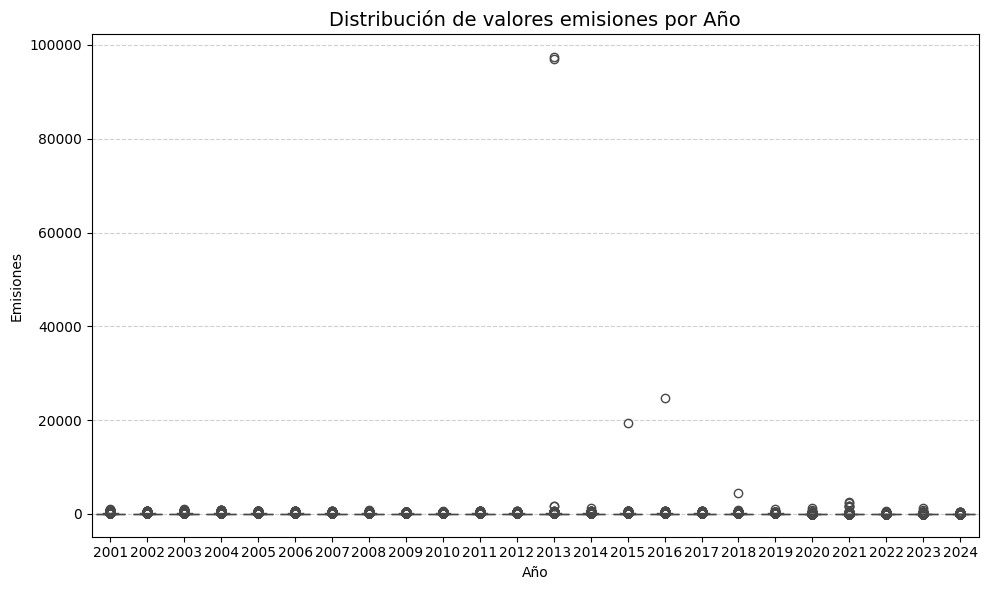

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='year', y='D.1', palette='coolwarm')
plt.title('Distribución de valores emisiones por Año', fontsize=14)
plt.xlabel('Año')
plt.ylabel('Emisiones')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

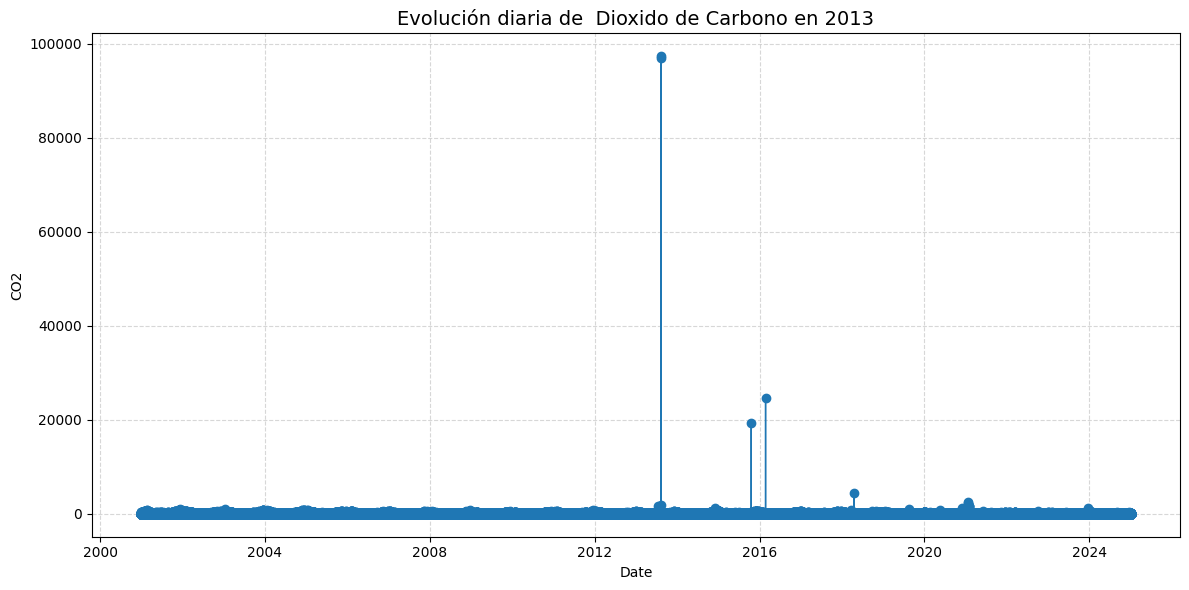

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['D.1'], marker='o', linewidth=1)

plt.title('Evolución diaria de  Dioxido de Carbono en 2013', fontsize=14)
plt.xlabel('Date')
plt.ylabel('CO2')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [25]:
#Filtramos desde el 2010
df= df[df['year'] > 2009]

#Check emisiones >500
df_500 = df[df['D.1'] > 500]

print(len(df_500))
print(df_500[['date', 'D.1']].sort_values(by='date', ascending=False))


100
              date     D.1
1002838 2023-12-20   906.8
1002837 2023-12-19  1235.6
959417  2022-09-30   574.0
936048  2021-06-04   677.0
887556  2021-01-27  1583.0
...            ...     ...
355945  2011-02-04   562.0
334741  2011-02-04   537.0
355944  2011-02-03   514.0
334720  2011-01-14   544.0
274548  2010-12-13   507.0

[100 rows x 2 columns]


In [26]:
df

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,year,month,day,D.1,V,FUENTE_ARCHIVO,date
299553,28,79,39,12,28079039_12_8,2010,1,1,38.00,V,datos10.csv,2010-01-01
298809,28,79,39,7,28079039_7_8,2010,1,1,9.00,V,datos10.csv,2010-01-01
309411,28,79,54,14,28079054_14_6,2010,1,1,71.00,V,datos10.csv,2010-01-01
283557,28,79,24,7,28079024_7_8,2010,1,1,2.00,V,datos10.csv,2010-01-01
315735,28,79,57,6,28079057_6_48,2010,1,1,0.20,V,datos10.csv,2010-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...
1079562,28,79,36,8,28079036_8_8,2024,12,31,41.96,V,datos24.csv,2024-12-31
1079531,28,79,36,7,28079036_7_8,2024,12,31,14.33,V,datos24.csv,2024-12-31
1079500,28,79,36,1,28079036_1_38,2024,12,31,2.63,V,datos24.csv,2024-12-31
1079748,28,79,38,10,28079038_10_47,2024,12,31,15.08,V,datos24.csv,2024-12-31


In [27]:
df.value_counts('ESTACION')

,count
ESTACION,
8,70595
24,68356
18,52233
55,50134
38,47881
11,32706
35,32508
57,31809
36,31444


##KNN

In [28]:
#Elimino los valores mayores a 500 y los valores 0

df.loc[(df['D.1'] > 500) , 'D.1'] = np.nan

#Segemento la informacion por estacion tambien para mejorar los imputer
df_aux = df.copy()
df_aux['estacion_cat'] = df_aux['ESTACION'].astype('category').cat.codes


columnas_para_imputar = ['D.1', 'estacion_cat']

imputer = KNNImputer(n_neighbors=5)
imputed_data = imputer.fit_transform(df_aux[columnas_para_imputar])

#Valores imputados
df['D.1'] = imputed_data[:, 0]

# Verificacion
print(f"Valores nulos después de imputar: {df['D.1'].isnull().sum()}")

Valores nulos después de imputar: 0


In [29]:
#Elimino los valores mayores a 500 y los valores 0
df_2025.loc[(df_2025['D.1'] > 500) , 'D.1'] = np.nan

#Segemento la informacion por estacion tambien para mejorar los imputer
df_aux_2025 = df_2025.copy()
df_aux_2025['estacion_cat'] = df_aux_2025['ESTACION'].astype('category').cat.codes


columnas_para_imputar_2025 = ['D.1', 'estacion_cat']

imputer_2025 = KNNImputer(n_neighbors=10)
imputed_data_2025 = imputer_2025.fit_transform(df_aux_2025[columnas_para_imputar_2025])

#Valores imputados
df_2025['D.1'] = imputed_data_2025[:, 0]

# Verificacion
print(f"Valores nulos después de imputar: {df_2025['D.1'].isnull().sum()}")

Valores nulos después de imputar: 0


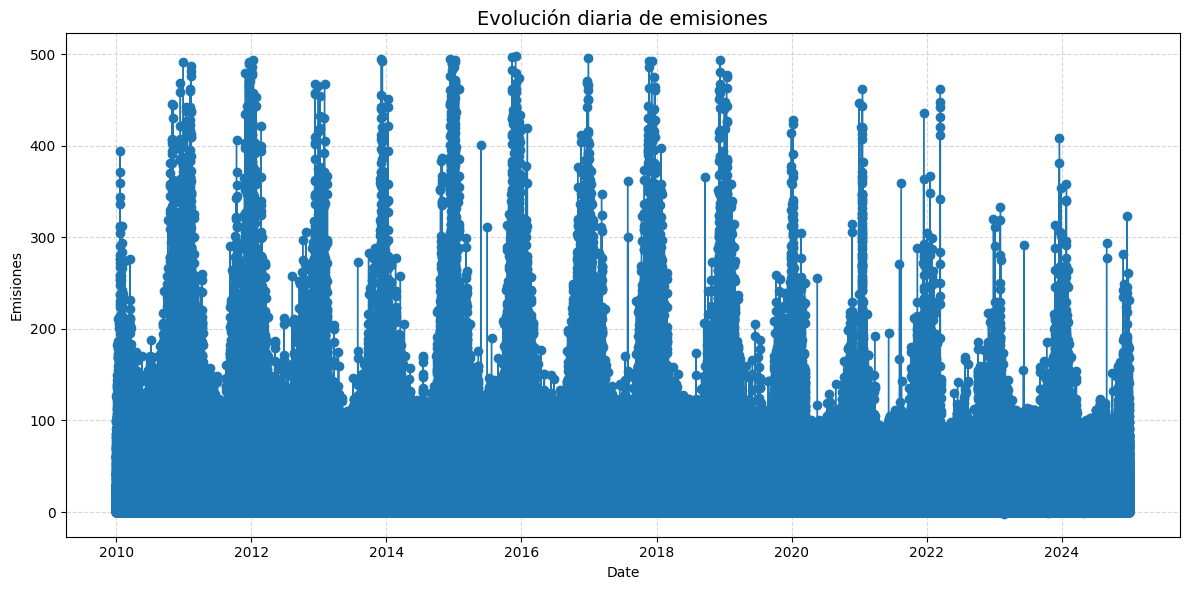

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['D.1'], marker='o', linewidth=1)

plt.title('Evolución diaria de emisiones', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Emisiones')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [31]:
df.head()

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,year,month,day,D.1,V,FUENTE_ARCHIVO,date
299553,28,79,39,12,28079039_12_8,2010,1,1,38.0,V,datos10.csv,2010-01-01
298809,28,79,39,7,28079039_7_8,2010,1,1,9.0,V,datos10.csv,2010-01-01
309411,28,79,54,14,28079054_14_6,2010,1,1,71.0,V,datos10.csv,2010-01-01
283557,28,79,24,7,28079024_7_8,2010,1,1,2.0,V,datos10.csv,2010-01-01
315735,28,79,57,6,28079057_6_48,2010,1,1,0.2,V,datos10.csv,2010-01-01


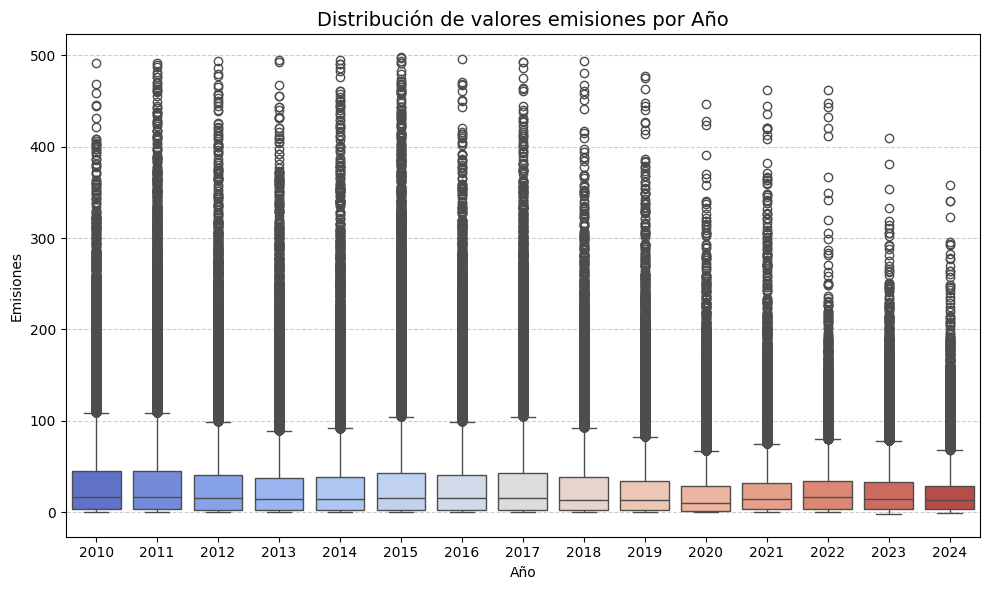

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='year', y='D.1', palette='coolwarm')
plt.title('Distribución de valores emisiones por Año', fontsize=14)
plt.xlabel('Año')
plt.ylabel('Emisiones')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

##Analisis

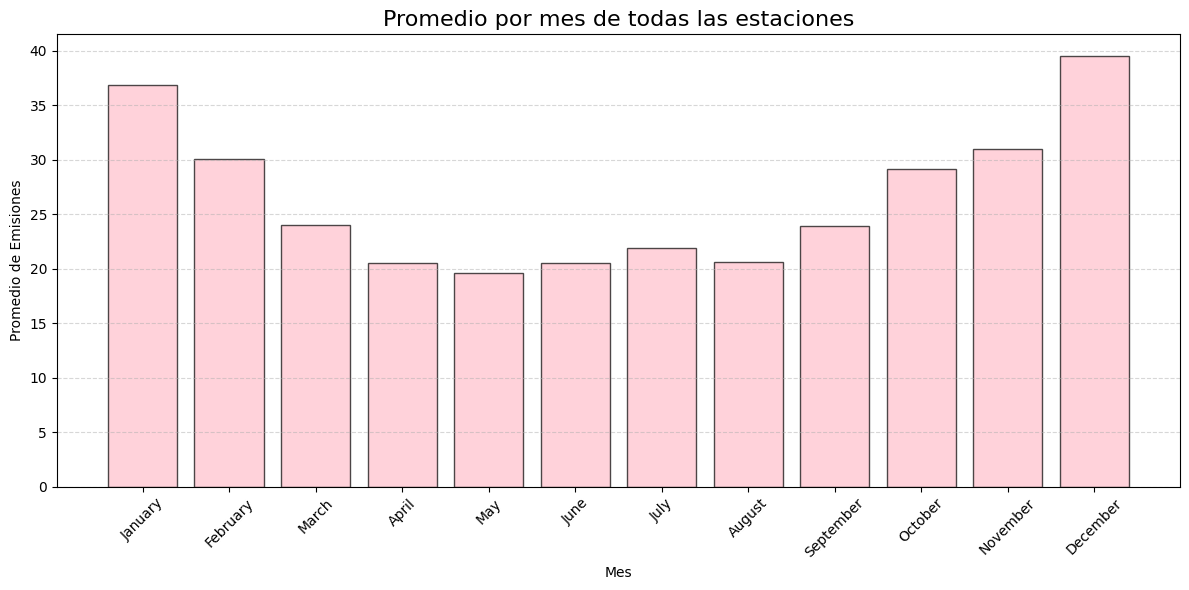

In [33]:
promedio_mensual = df.groupby(df['date'].dt.month)['D.1'].mean()

plt.figure(figsize=(12, 6))

plt.bar(promedio_mensual.index, promedio_mensual.values, color='pink', edgecolor='black', alpha=0.7)

nombres_meses = [calendar.month_name[i] for i in range(1, 13)]
plt.xticks(promedio_mensual.index, nombres_meses, rotation=45)

plt.title('Promedio por mes de todas las estaciones', fontsize=16)
plt.xlabel('Mes')
plt.ylabel('Promedio de Emisiones')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()

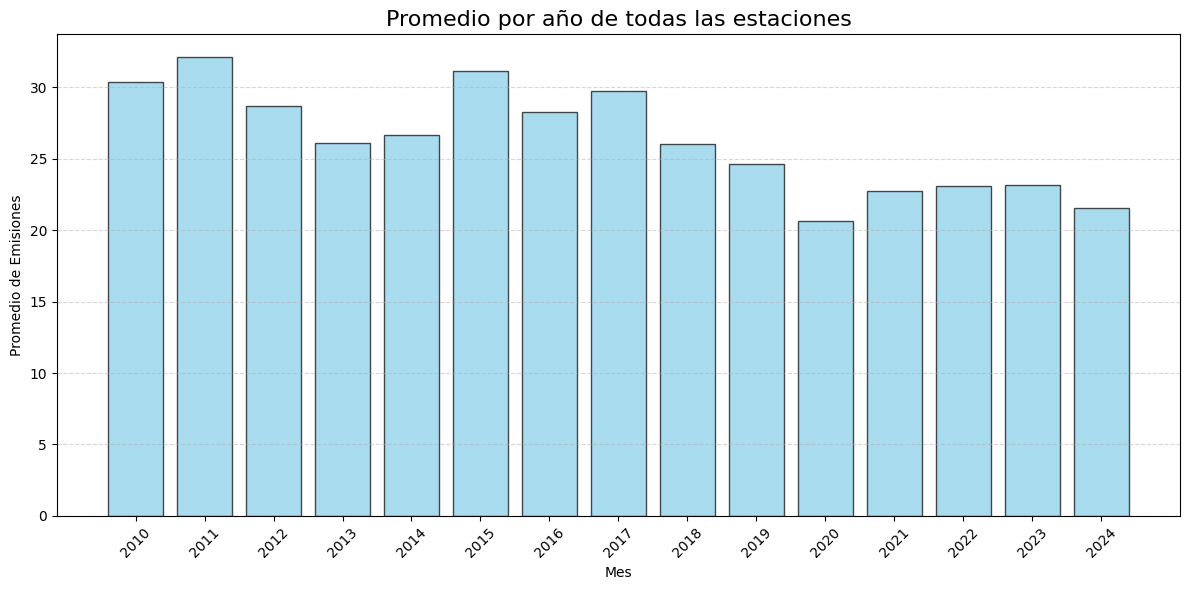

In [34]:
promedio_anual = df.groupby(df['date'].dt.year)['D.1'].mean()

plt.figure(figsize=(12, 6))

plt.bar(promedio_anual.index, promedio_anual.values, color='skyblue', edgecolor='black', alpha=0.7)


plt.xticks(promedio_anual.index, rotation=45)
plt.title('Promedio por año de todas las estaciones', fontsize=16)
plt.xlabel('Mes')
plt.ylabel('Promedio de Emisiones')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()

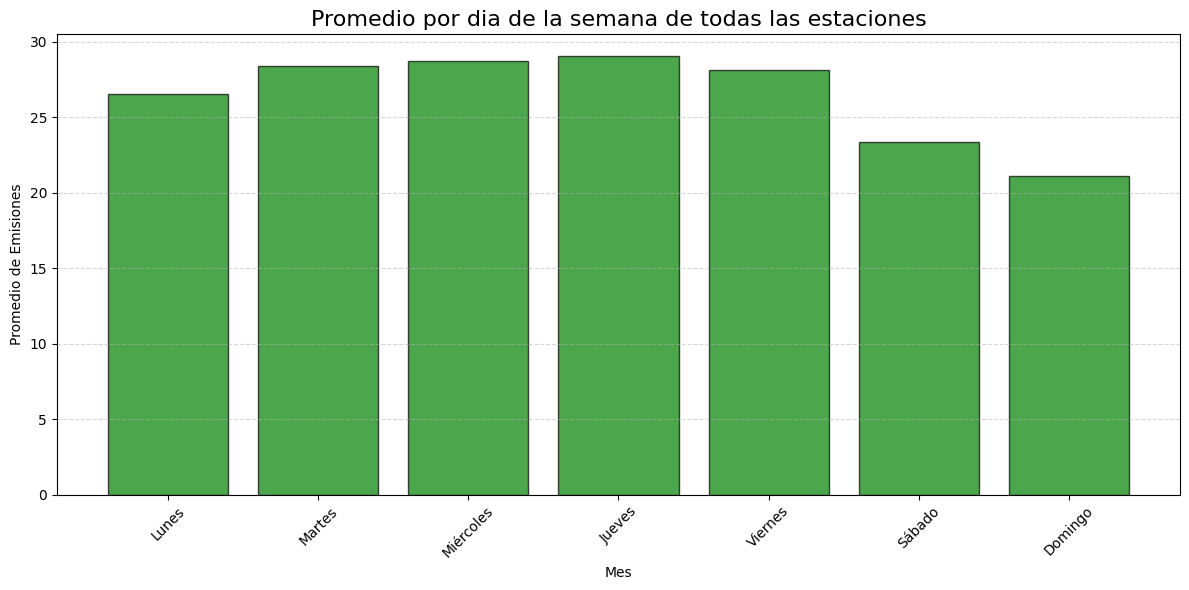

In [35]:
df['date'] = pd.to_datetime(df['date'])
df['dia_semana'] = df['date'].dt.dayofweek

# Promedio
promedio_semanal = df.groupby('dia_semana')['D.1'].mean()
plt.figure(figsize=(12, 6))

plt.bar(promedio_semanal.index, promedio_semanal.values, color='green', edgecolor='black', alpha=0.7)


nombres_dias = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
plt.xticks(promedio_semanal.index, nombres_dias, rotation=45)
plt.title('Promedio por dia de la semana de todas las estaciones', fontsize=16)
plt.xlabel('Mes')
plt.ylabel('Promedio de Emisiones')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()

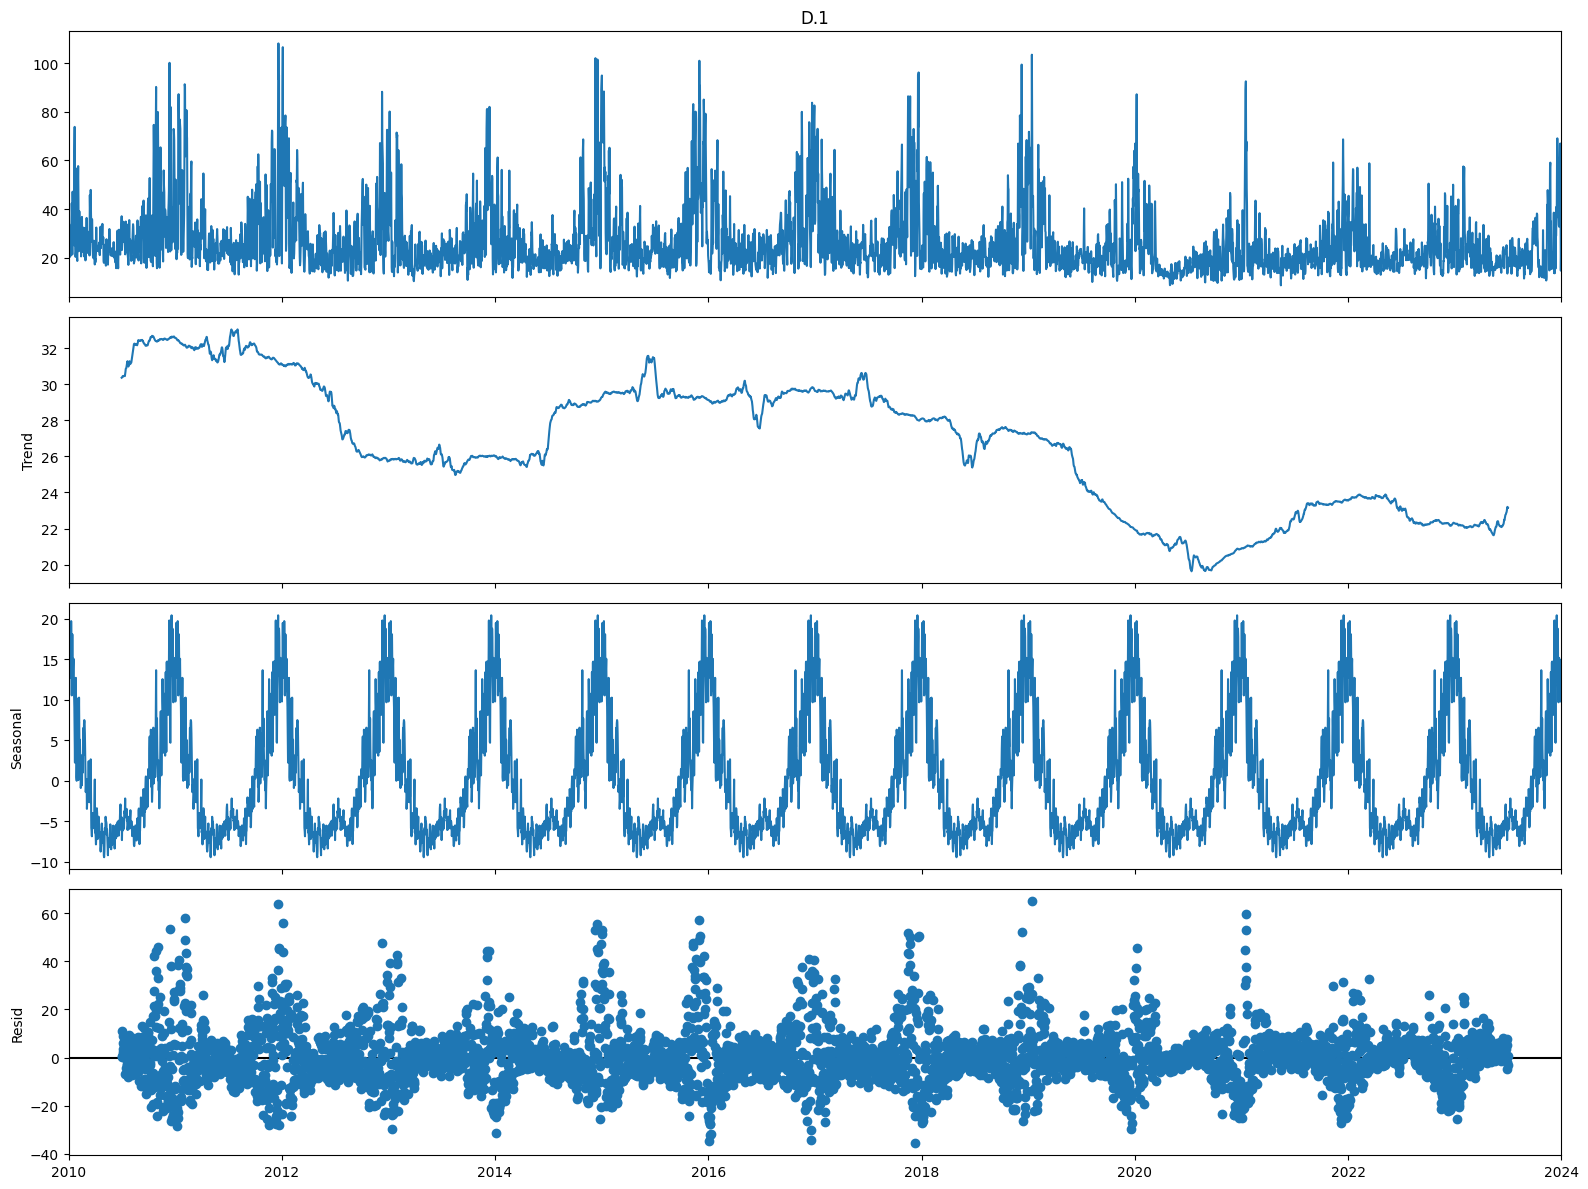

In [36]:
#Dataset agrupando por dia,
diario = df.groupby('date')['D.1'].mean()

# Filtro datos
mask_year = (diario.index >= '2010') & (diario.index <= '2024')
datos_limpios = diario.loc[mask_year]

# Descmomposcion anual de los datos
result = sm.tsa.seasonal_decompose(datos_limpios.dropna(), model='additive', period=365)

# Grafica
fig = result.plot()
fig.set_size_inches(16, 12)
plt.tight_layout()
plt.show()

In [37]:
df = df.set_index('date')

### Test ADF

In [39]:
mask_test = (df.index >= '2010') & (df.index <= '2024')

df_test_est_copy = df.loc[mask_test].copy()
df_test_est= df_test_est_copy['D.1'].dropna()
df_test_est.head()


,D.1
date,
2010-01-01,38.0
2010-01-01,9.0
2010-01-01,71.0
2010-01-01,2.0
2010-01-01,0.2


In [40]:
dftest = adfuller(df_test_est, maxlag=50, autolag=None)

In [41]:
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value',
                                         '#Lags Used',
                                         'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Test Statistic                    -44.546706
p-value                             0.000000
#Lags Used                         50.000000
Number of Observations Used    753834.000000
Critical Value (1%)                -3.430359
Critical Value (5%)                -2.861544
Critical Value (10%)               -2.566772
dtype: float64


In [42]:
kpsstest = kpss(df_test_est)
kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
for key,value in kpsstest[3].items():
    kpss_output['Critical Value (%s)'%key] = value
print (kpss_output)

Test Statistic             8.520164
p-value                    0.010000
Lags Used                444.000000
Critical Value (10%)       0.347000
Critical Value (5%)        0.463000
Critical Value (2.5%)      0.574000
Critical Value (1%)        0.739000
dtype: float64


In [44]:
df_test_est.describe()

,D.1
count,753885.000000
mean,26.765519
std,36.887231
min,-2.000000
25%,2.000000
50%,14.000000
75%,38.000000
max,498.000000


In [45]:
df

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,year,month,day,D.1,V,FUENTE_ARCHIVO,dia_semana
date,,,,,,,,,,,,
2010-01-01,28,79,39,12,28079039_12_8,2010,1,1,38.00,V,datos10.csv,4
2010-01-01,28,79,39,7,28079039_7_8,2010,1,1,9.00,V,datos10.csv,4
2010-01-01,28,79,54,14,28079054_14_6,2010,1,1,71.00,V,datos10.csv,4
2010-01-01,28,79,24,7,28079024_7_8,2010,1,1,2.00,V,datos10.csv,4
2010-01-01,28,79,57,6,28079057_6_48,2010,1,1,0.20,V,datos10.csv,4
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,28,79,36,8,28079036_8_8,2024,12,31,41.96,V,datos24.csv,1
2024-12-31,28,79,36,7,28079036_7_8,2024,12,31,14.33,V,datos24.csv,1
2024-12-31,28,79,36,1,28079036_1_38,2024,12,31,2.63,V,datos24.csv,1


#Segmentacion del dataset

In [52]:
df= df[['ESTACION', 'D.1']]

In [53]:
df_2025 = df_2025[['ESTACION', 'date', 'D.1']]

##Estacion 35

In [46]:
df_35 = df[df["ESTACION"] == 35]
df_35_2025 = df_2025[df_2025["ESTACION"] == 35]

In [47]:
df_35 = df_35[[ 'D.1']]
df_35.head()

,D.1
date,
2010-01-01,24.0
2010-01-01,34.0
2010-01-01,58.0
2010-01-01,10.0
2010-01-01,0.3


In [48]:

df_35= df_35.groupby(level=0).mean()
df_35

,D.1
date,
2010-01-01,22.050000
2010-01-02,32.400000
2010-01-03,45.266667
2010-01-04,48.933333
2010-01-05,36.083333
...,...
2024-12-27,23.760000
2024-12-28,26.041667
2024-12-29,23.895000


In [49]:
df_35_2025 = df_35_2025.set_index('date')
df_35_2025.describe()

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,year,month,day,D.1
count,2190.0,2190.0,2190.0,2190.000000,2190.0,2190.000000,2190.000000,2190.000000
mean,28.0,79.0,35.0,8.000000,2025.0,6.526027,15.720548,21.602192
std,0.0,0.0,0.0,4.204133,0.0,3.448639,8.798256,24.834878
min,28.0,79.0,35.0,1.000000,2025.0,1.000000,1.000000,0.200000
25%,28.0,79.0,35.0,6.000000,2025.0,4.000000,8.000000,3.000000
50%,28.0,79.0,35.0,7.500000,2025.0,7.000000,16.000000,12.000000
75%,28.0,79.0,35.0,12.000000,2025.0,10.000000,23.000000,31.000000
max,28.0,79.0,35.0,14.000000,2025.0,12.000000,31.000000,157.000000


In [50]:
df_35_2025 = df_35_2025[[ 'D.1']]
df_35_2025.head()

,D.1
date,
2025-01-01,5.0
2025-01-01,62.0
2025-01-01,28.0
2025-01-01,0.5
2025-01-01,15.0


In [51]:
df_35_2025= df_35_2025.groupby(level=0).mean()
df_35_2025.head()

,D.1
date,
2025-01-01,24.750000
2025-01-02,32.433333
2025-01-03,28.583333
2025-01-04,26.083333
2025-01-05,17.733333


#LTSM


In [58]:
df_total = pd.concat([df_35, df_35_2025])
df_total.index = pd.to_datetime(df_total.index)
type(df_total.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [59]:
df_total

,D.1
date,
2010-01-01,22.050000
2010-01-02,32.400000
2010-01-03,45.266667
2010-01-04,48.933333
2010-01-05,36.083333
...,...
2025-12-27,22.583333
2025-12-28,18.733333
2025-12-29,22.400000


In [60]:
y = df_total.copy()
y.index = pd.to_datetime(y.index)
y = y.asfreq('D')

y_train = y.loc['2010':'2023']
y_val = y.loc['2024':'2024']
y_test = y.loc['2025':'2025']
y_train_val = pd.concat([y_train, y_val])

In [61]:
# 2. División de datos (Splitting)
d_tr = df_total['2010':'2023']   # 14 años de historia
d_va   = df_total['2024':'2024']   # Validación
d_te  = df_total['2025':'2025']


n_tr = len(d_tr)
n_va = len(d_tr)
n_te = len(d_tr)

In [62]:

def create_rnn():
    set_random_seed(123)
    model = Sequential([
        Input(shape=(30, 1)),
        LSTM(128, return_sequences=True),
        Dropout(0.3),
        LSTM(64, return_sequences=True),
        Dropout(0.2),
        LSTM(64, return_sequences=False),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1)
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.0005),
        loss='mse',
        metrics=['mae']
    )
    return model




In [66]:
def create_dataset(s, h=0, batch_size=32):
    y = s[h+1:]
    x = s[:-(h+1)]

    scaler_x = MinMaxScaler()
    scaler_y = MinMaxScaler()
    x = scaler_x.fit_transform(np.array(x).reshape(-1, 1))
    y = scaler_y.fit_transform(np.array(y).reshape(-1, 1))
    dataset = timeseries_dataset_from_array(x, y, sequence_length=30, batch_size=batch_size)

    total_batches = len(list(dataset))

    tr_size = int(total_batches * 0.80)
    va_size = int(total_batches * 0.10)
    dataset_tr = dataset.take(tr_size)
    dataset_va = dataset.skip(tr_size).take(va_size)
    dataset_te = dataset.skip(tr_size + va_size)

    batches_te = list(dataset_te)
    if len(batches_te) == 0:
        raise ValueError(f"⚠️ El test sigue vacío. Total batches: {total_batches}.")

    y_te = np.concatenate([batch[1].numpy() for batch in batches_te])
    y_te = scaler_y.inverse_transform(y_te)

    return dataset_tr, dataset_va, dataset_te, y_te, scaler_y  # ✅ 5 valores

In [ ]:
df_35.head()

In [75]:
#Prediccion de los datos
mae_lstm=[]
epochs=50
h=0
start = 0

end = 365
horizontes = [1, 6,7, 13,14]
first_iteration = True
mae_lstm = []

H2 – x shape: (32, 30, 1), y shape: (32, 1)
Epoch 1/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0192 - mae: 0.0985 - val_loss: 0.0031 - val_mae: 0.0392 - learning_rate: 5.0000e-04
Epoch 2/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0126 - mae: 0.0773 - val_loss: 0.0043 - val_mae: 0.0484 - learning_rate: 5.0000e-04
Epoch 3/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0111 - mae: 0.0723 - val_loss: 0.0027 - val_mae: 0.0384 - learning_rate: 5.0000e-04
Epoch 4/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0099 - mae: 0.0656 - val_loss: 0.0032 - val_mae: 0.0406 - learning_rate: 5.0000e-04
Epoch 5/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0087 - mae: 0.0653 - val_loss: 0.0022 - val_mae: 0.0327 - learning_rate: 5.0000e-04
Epoch 6/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0081 - mae: 0.0619 - val_loss: 0.0033 - val_mae: 0.0422 - learning_rate: 5.0000e-04
Epoch 7/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0101

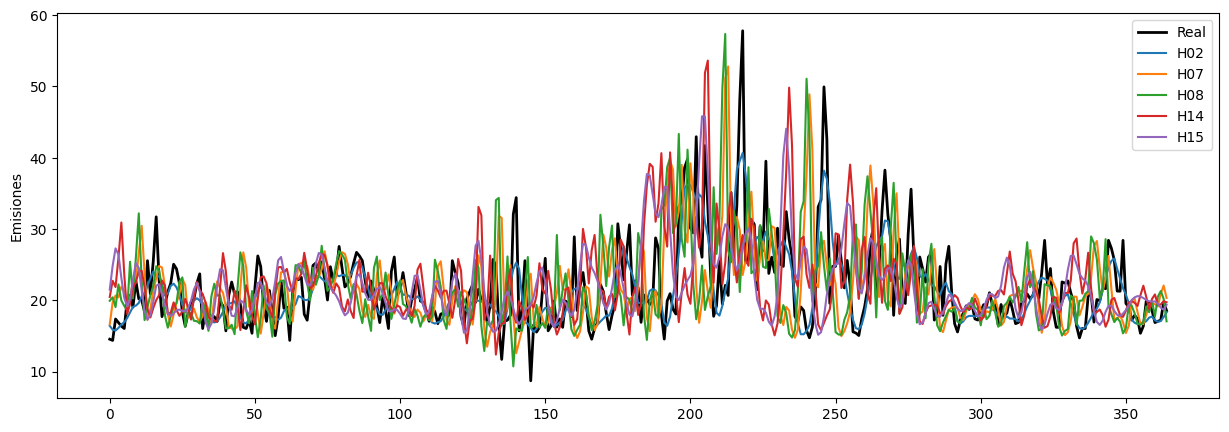

mae_lstm tiene 5 valores: [2.3658175786783997, 0.8919477982913482, 0.4189389034918336, 0.9596776553595382, 1.948796647332452]


In [76]:


callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=14,
        restore_best_weights=True
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=7,
        min_lr=1e-6
    )
]

for h in horizontes:
    rnn = create_rnn()
    dataset_tr, dataset_va, dataset_te, y_te, scaler_y = create_dataset(df_total, h=h)

    for batch in dataset_tr.take(1):
        print(f"H{h} – x shape: {batch[0].shape}, y shape: {batch[1].shape}")

    ahora = datetime.now()
    fecha_str = ahora.strftime("%Y%m%d %H:%M")
    file = f"{output_folder}/predLSTM_H{h}_fecha{fecha_str}.npy"

    if isfile(file):
        preds_rnn = np.load(file)
        if preds_rnn.max() <= 1.0:
            preds_rnn = scaler_y.inverse_transform(preds_rnn.reshape(-1, 1)).flatten()
    else:
        history_rnn = rnn.fit(
            dataset_tr,
            validation_data=dataset_va,
            epochs=100,
            callbacks=callbacks,
            verbose=1
        )
        preds_rnn = rnn.predict(dataset_te, verbose=0)
        preds_rnn = scaler_y.inverse_transform(preds_rnn)
        preds_rnn = preds_rnn.flatten()
        np.save(file, preds_rnn)

    if first_iteration:
        plt.plot(y_te[start:end], "k", label='Real', linewidth=2)
        first_iteration = False

    plot_start = max(0, start - h)
    plot_end = min(len(preds_rnn), plot_start + (end - start))
    plt.plot(preds_rnn[plot_start:plot_end], label=f'H{h+1:02d}')

    min_len = min(len(y_te), len(preds_rnn))
    mae_lstm.append(mean_absolute_error(y_te[:min_len].flatten(), preds_rnn[:min_len].flatten()))

plt.ylabel("Emisiones")
plt.legend()
plt.show()

# Verificar
print(f"mae_lstm tiene {len(mae_lstm)} valores: {mae_lstm}")

In [77]:
print("\n" + "="*60)
print("COMPARATIVA DE MODELOS - PREDICCIÓN EMISIONES CO2 MADRID")
print("="*60)

media = float(y_test.mean())

print(f"\nMedia emisiones 2025: {media:.2f}")

print("\nLSTM por horizonte:")
for i, h in enumerate(horizontes):
    mae = float(mae_lstm[i])
    print(f"  H+{h:2d}:   MAE = {mae:.2f}  ({(mae/media)*100:.1f}%)")


COMPARATIVA DE MODELOS - PREDICCIÓN EMISIONES CO2 MADRID

Media emisiones 2025: 21.60

LSTM por horizonte:
  H+ 2:   MAE = 2.37  (11.0%)
  H+ 7:   MAE = 0.89  (4.1%)
  H+ 8:   MAE = 0.42  (1.9%)
  H+14:   MAE = 0.96  (4.4%)
  H+15:   MAE = 1.95  (9.0%)


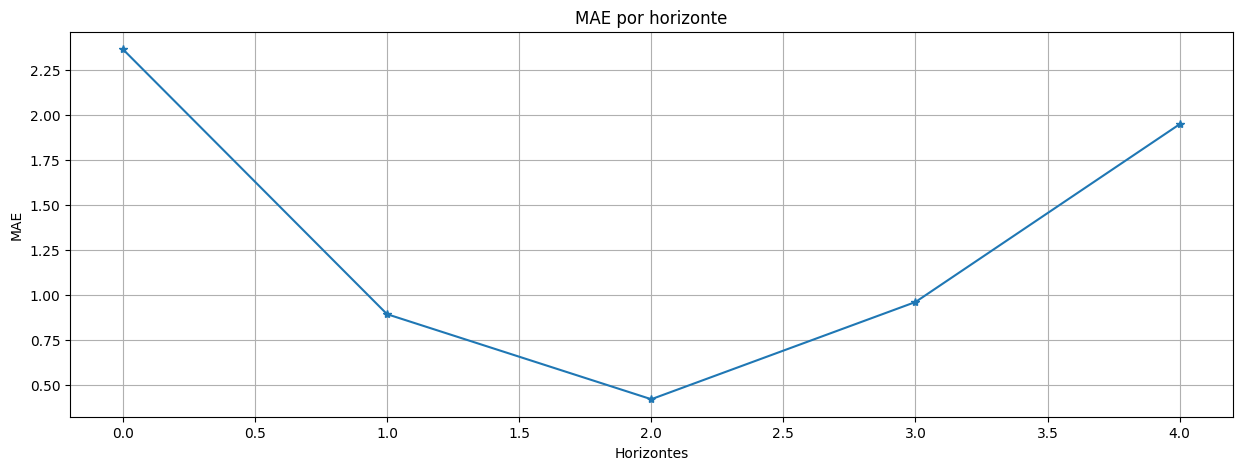

MAE Total H01: 2.37
MAE Total H02: 0.89
MAE Total H03: 0.42
MAE Total H04: 0.96
MAE Total H05: 1.95


In [78]:
# Evolución del MAE por horizonte
plt.plot(mae_lstm, marker="*", linestyle="-")
plt.xlabel("Horizontes")
plt.ylabel("MAE")
plt.title("MAE por horizonte")
plt.grid(True)
plt.show()

# Resultados - iterar sobre los índices reales de mae_lstm
for i, mae_value in enumerate(mae_lstm):
    print("MAE Total H%02d: %.2f" % (i + 1, mae_value))

#SARIMAX

In [ ]:
plt.figure(); tsaplots.plot_acf(df_35); plt.show()
plt.figure(); tsaplots.plot_pacf(df_35); plt.show()

In [ ]:
df_diff = df_35.diff().dropna()
plt.figure(); tsaplots.plot_acf(df_diff); plt.show()
plt.figure(); tsaplots.plot_pacf(df_diff); plt.show()

###Train

In [ ]:
#DEFINICIÓN DEL MODELO
#Estos hiperparametros fueron seleccionados de acuerdo a los graficos de ACF y PACF
p =1
q = 1
d =1 #Ya  que existe una variacion negativa mes a mes
period_param=0
seasonal_order = (1, 1, 1, 365)


In [ ]:
df_total = pd.concat([df_35, df_35_2025])
df_total.index = pd.to_datetime(df_total.index)
type(df_total.index)


In [ ]:
y = df_total.copy()
y.index = pd.to_datetime(y.index)
y = y.asfreq('D')

y_train = y.loc['2010':'2023']
y_val = y.loc['2024':'2024']
y_test = y.loc['2025':'2025']
y_train_val = pd.concat([y_train, y_val])



In [ ]:
# Sin transformación logarítmica
model = SARIMAX(
    y_train_val,  # SIN np.log()
    order=(1, 1, 1),
    seasonal_order=(seasonal_order),
    enforce_stationarity=False,
    enforce_invertibility=False
)

res = model.fit(disp=False)
pred_test = res.get_forecast(steps=len(y_test)).predicted_mean
pred_test.index = y_test.index

mae_test = mean_absolute_error(y_test, pred_test)
print(f"MAE sin log: {mae_test:.3f}")


In [ ]:
# Gráfico
plt.figure(figsize=(14, 6))

# Últimas semanas de 2024 para contexto
plt.plot(y_train_val.loc['2024-11':], label='Histórico (Nov-Dic 2024)',
         color='gray', alpha=0.6, linewidth=1.5)

# 2025: Real vs Predicción
plt.plot(y_test, label='Real (2025)', color='black', linewidth=2, alpha=0.7)
plt.plot(pred_test, label='Predicción SARIMAX (diaria)', color='red',
         linestyle='--', linewidth=1.5, alpha=0.8)

plt.title(f"Predicción vs Real 2025 - Diario (MAE: {mae_test:.2f})")
plt.xlabel('Fecha')
plt.ylabel('Emisiones CO2')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# Grid search simple
for p in [0, 1, 2]:
    for q in [0, 1, 2]:
        try:
            model_test = SARIMAX(
                np.log(y_train_val),
                order=(p, 1, q),
                seasonal_order=(2, 1, 1, 7),
                enforce_stationarity=False,
                enforce_invertibility=False
            )
            res_test = model_test.fit(disp=False)
            pred_val = np.exp(res_test.get_forecast(steps=len(y_val)).predicted_mean)
            mae_val = mean_absolute_error(y_val, pred_val)
            print(f"p={p}, q={q} -> MAE: {mae_val:.3f}")
        except:
            continue

p=0, q=0 -> MAE: 5.325
p=0, q=1 -> MAE: 5.794
p=0, q=2 -> MAE: 6.680
p=1, q=0 -> MAE: 5.540
p=1, q=1 -> MAE: 6.215
p=1, q=2 -> MAE: 6.421
p=2, q=0 -> MAE: 5.802
p=2, q=1 -> MAE: 6.415
p=2, q=2 -> MAE: 6.392
